<a href="https://colab.research.google.com/github/sadVries/PRA3024/blob/main/LHCb_2024_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 5!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

In [1]:
#run this once per kernal crash
#!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
#!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
#!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
#!apt-get install libpython3.6-dev

In [2]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-12 20:00:47--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.36, 91.189.91.82, 91.189.91.81, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb.3’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  1.65MB/s    in 0.8s    

2024-03-12 20:00:48 (1.65 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb.3’ saved [1318204/1318204]

(Reading database ... 121912 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) over (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dial

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')


<CDLL '/content/root_build/lib//libTreePlayer.so', handle 5825522d42e0 at 0x79fb1906eda0>

Welcome to JupyROOT 6.28/04


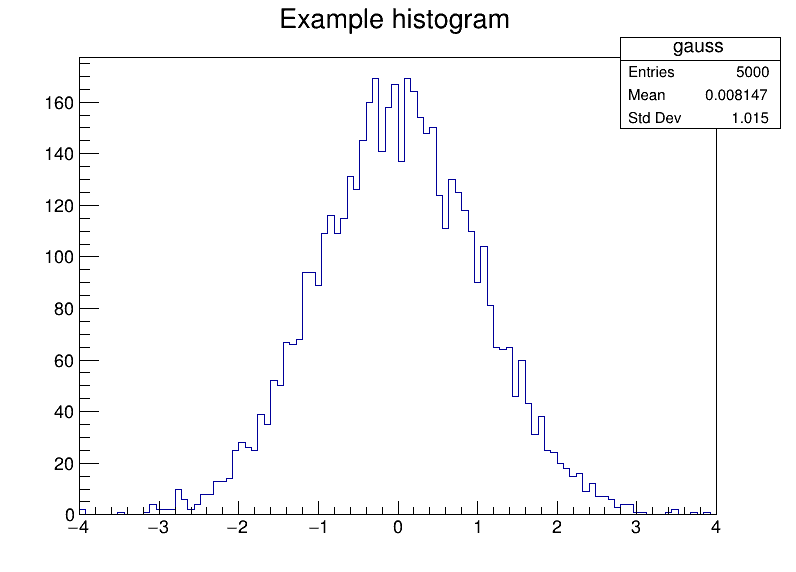

In [4]:
#Now we can check if we have everything working as we expect:
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

In [5]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

mkdir: cannot create directory ‘LHCb_Data’: File exists


In [6]:
#!pip install uproot

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because H1_PZ cannot accommodate the value 51820.2
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because H1_PX cannot accommodate the value -4985.13
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because H1_PZ cannot accommodate the value 90762.7
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because H1_PY cannot accommodate the value 3413.79
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 4967545 out-of-range events


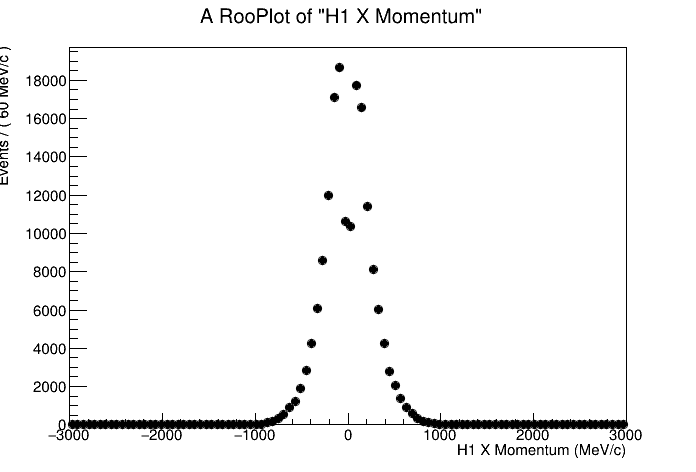

In [7]:

#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root", "READONLY")
#From our file, we have to extract the DecayTree
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [8]:
import numpy as np

In [9]:
import uproot

In [10]:
import matplotlib.pyplot as plt

In [11]:
def FATC(string1, string2): #FreakingAnnoyingTreeCalling just guess what this function does if you dare
  return ([string1 +"1"+string2,string1 +"2"+string2,string1 +"3"+ string2])

First we load our data

Second we Calculate our the total momentum per H

Third we get our total momentum

In [12]:
events = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
tree=events['DecayTree']
Array =tree.arrays( FATC("H","_ProbK") + FATC("H","_ProbPi") + FATC("H","_PX") +FATC("H","_PY")+FATC("H","_PZ") +FATC("H","_isMuon") + FATC("H","_Charge")+ ["B_VertexChi2"])

Array["H1_PTOT"]  = np.sqrt(Array['H1_PX']**2 + Array['H1_PY']**2 + Array['H1_PZ']**2)
Array["H2_PTOT"]  = np.sqrt(Array['H2_PX']**2 + Array['H2_PY']**2 + Array['H2_PZ']**2)
Array["H3_PTOT"]  = np.sqrt(Array['H3_PX']**2 + Array['H3_PY']**2 + Array['H3_PZ']**2)
Array["MP_PTOT"] = ((Array.H1_PX+Array.H2_PX+Array.H3_PX)**2 + (Array.H1_PY+Array.H2_PY+Array.H3_PY)**2 + (Array.H1_PZ+Array.H2_PZ+Array.H3_PZ)**2)**0.5

Now plot the total momentum for the mother (M_Ptot)

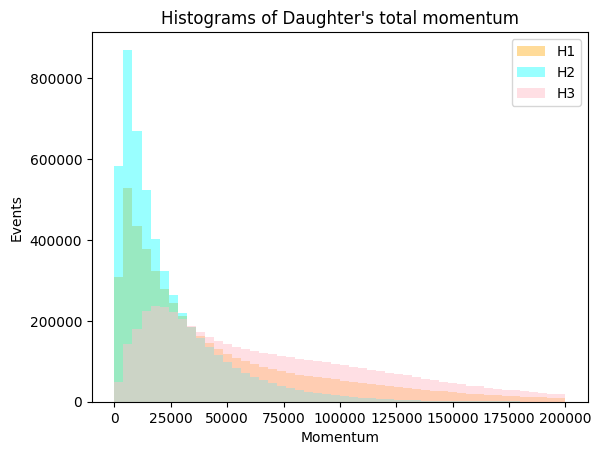

In [13]:
#Here make a plot of the Total momentum of each of the three daughters with some cool colours
plt.hist(Array.H1_PTOT, range=(0, 2e5), bins= 50, color="orange", alpha=0.4,label ='H1')
plt.hist(Array.H2_PTOT, range=(0, 2e5), bins= 50, color="cyan", alpha=0.4,label ='H2')
plt.hist(Array.H3_PTOT, range=(0, 2e5), bins= 50, color="pink", alpha=0.5,label ='H3')
plt.title("Histograms of Daughter's total momentum")
plt.xlabel("Momentum")
plt.ylabel("Events")
plt.legend()
plt.show()

In [14]:
#use the histogram plotting tools, plot the momentum of the mother

In [15]:
Array["MP_PTOT"] = ((Array.H1_PX+Array.H2_PX+Array.H3_PX)**2 + (Array.H1_PY+Array.H2_PY+Array.H3_PY)**2 + (Array.H1_PZ+Array.H2_PZ+Array.H3_PZ)**2)**0.5

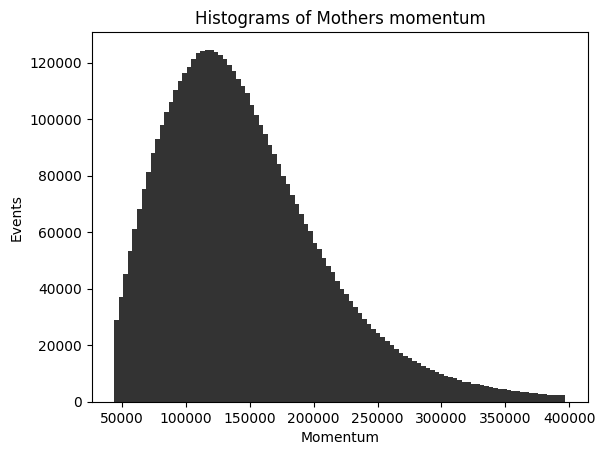

In [16]:
#find min and max values based on percentile to make boundaries so the histogram is clearer
min_value = np.percentile(Array.MP_PTOT, 1)
max_value =  np.percentile(Array.MP_PTOT, 99)

plt.hist(Array.MP_PTOT, range=(min_value, max_value), bins= 100, color="black", alpha=0.8)
ax = plt.gca()

plt.title("Histograms of Mothers momentum")
plt.xlabel("Momentum")
plt.ylabel("Events")
plt.show()

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [17]:
#Printed entry 45 as a list for all of its args

print("Printing all entries 45 of our array:\n" )
print((Array[45].tolist()))

Printing all entries 45 of our array:

{'H1_ProbK': 0.012183159589767456, 'H2_ProbK': 0.6670113801956177, 'H3_ProbK': 0.07501816749572754, 'H1_ProbPi': 0.8191394209861755, 'H2_ProbPi': 0.04563945531845093, 'H3_ProbPi': 0.428352952003479, 'H1_PX': 420.3413896413646, 'H2_PX': -985.6367588987478, 'H3_PX': -6242.300384410311, 'H1_PY': -110.66276079201207, 'H2_PY': 630.9893539299605, 'H3_PY': -862.2130979651508, 'H1_PZ': 5883.766388082404, 'H2_PZ': 35342.13861801284, 'H3_PZ': 277275.49225626234, 'H1_isMuon': 1, 'H2_isMuon': 0, 'H3_isMuon': 0, 'H1_Charge': -1, 'H2_Charge': 1, 'H3_Charge': 1, 'B_VertexChi2': 1.865567179221614, 'H1_PTOT': 5899.8, 'H2_PTOT': 35361.51, 'H3_PTOT': 277347.09, 'MP_PTOT': 318574.324615782}


We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee! (thanks for getting me a coffe btw Chris)

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

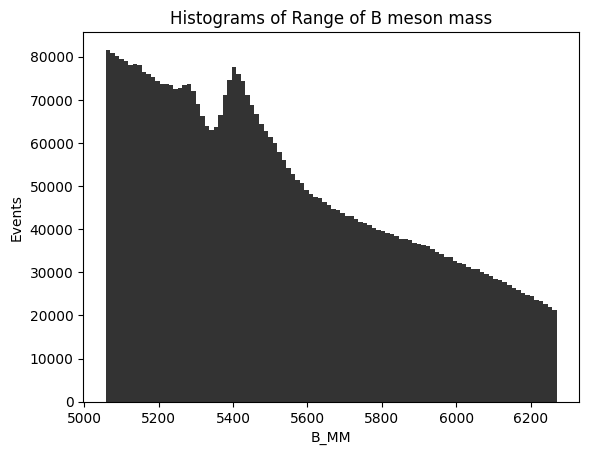

In [18]:
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?

M_kaon = 493.677 #MeV/c
speed_o_light = 3e8

Array["H1_kaon"] = H1_kaon = np.sqrt(Array.H1_PTOT**2  + M_kaon**2)
Array["H2_kaon"] = H2_kaon = np.sqrt(Array.H2_PTOT**2  + M_kaon**2)
Array["H3_kaon"] = H3_kaon = np.sqrt(Array.H3_PTOT**2  + M_kaon**2)
B_E = Array.H1_kaon + Array.H2_kaon + Array.H3_kaon

#Using total momnetom to find the mass of B

Array["B_MM"] = B_MM = np.sqrt(B_E**2 - (Array.MP_PTOT**2 ))

# same percentile thing
min_value = np.percentile(Array["B_MM"], 1)
max_value =  np.percentile(Array["B_MM"], 99)

plt.hist(Array["B_MM"], range=(min_value, max_value), bins= 100, color="black", alpha=0.8)
plt.title("Histograms of Range of B meson mass")
plt.xlabel("B_MM")
plt.ylabel("Events")
plt.show()

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

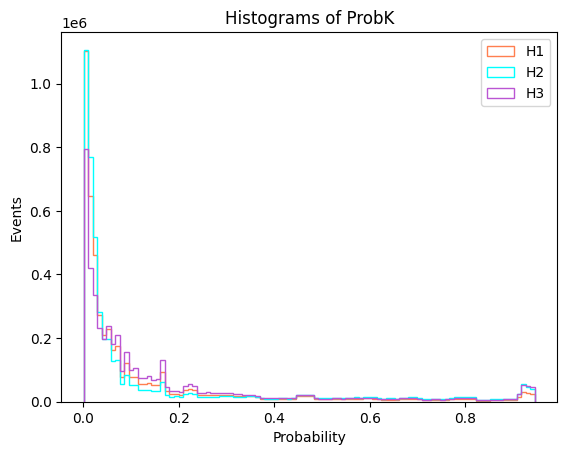

In [19]:
#Make plots of H1/H2/H3 _ProbK on one plot

min_value = np.percentile(Array["H1_ProbK"], 1)
max_value =  np.percentile(Array["H1_ProbK"], 99)

plt.hist(Array["H1_ProbK"], range=(min_value, max_value), bins= 100, color="coral", histtype= 'step',label ='H1')
plt.hist(Array["H2_ProbK"], range=(min_value, max_value), bins= 100, color="cyan", histtype= 'step',label ='H2')
plt.hist(Array["H3_ProbK"], range=(min_value, max_value), bins= 100, color="mediumorchid", histtype= 'step',label ='H3')
plt.title("Histograms of ProbK")
plt.xlabel("Probability")
plt.ylabel("Events")
plt.legend()
plt.show()

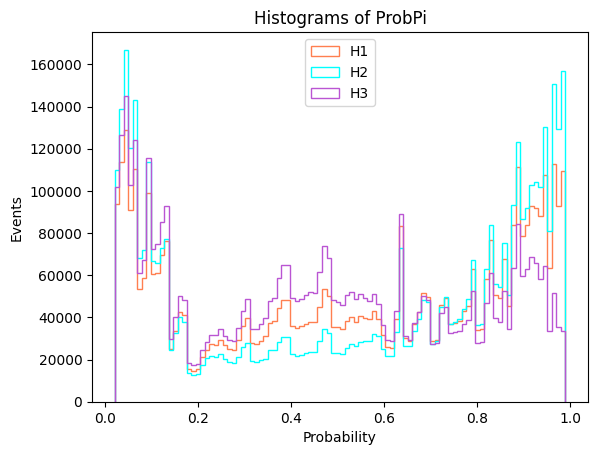

In [20]:
#Make plots of H1/H2/H3 _ProbPi on one plot

min_value = np.percentile(Array["H1_ProbPi"], 1)
max_value =  np.percentile(Array["H1_ProbPi"], 99)

plt.hist(Array["H1_ProbPi"], range=(min_value, max_value), bins= 100, color="coral", histtype= 'step',label ='H1')
plt.hist(Array["H2_ProbPi"], range=(min_value, max_value), bins= 100, color="cyan", histtype= 'step',label ='H2')
plt.hist(Array["H3_ProbPi"], range=(min_value, max_value), bins= 100, color="mediumorchid", histtype= 'step',label ='H3')
plt.title("Histograms of ProbPi")
plt.xlabel("Probability")
plt.ylabel("Events")
plt.legend()
plt.show()

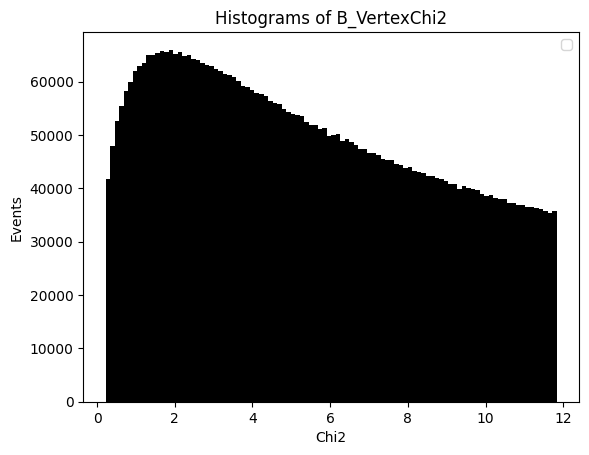

In [21]:
#For all our particles, make a plot of the B_VertexChi2

min_value = np.percentile(Array["B_VertexChi2"], 1)
max_value =  np.percentile(Array["B_VertexChi2"], 99)

plt.hist(Array["B_VertexChi2"], range=(min_value, max_value), bins= 100, color="black", histtype= 'stepfilled')
plt.title("Histograms of B_VertexChi2")
plt.xlabel("Chi2")
plt.ylabel("Events")
plt.legend()
plt.show()

Using these plots, we can now make a preselection string. This is a text string that looks like

In [22]:
import awkward

In [23]:
#Behold the genius code for selecting it has a low runtime and is easy to use, some call me a genius, most call me full of myself
#np.where get us only the indexes we want based on Boolean statements then we add the [0] to get the array of indexes out
#Next we use np.take() to get the correct values from our index array

cutselection = np.where(
    (Array.H1_ProbK > Array.H1_ProbPi)
    & (Array.H2_ProbK > Array.H2_ProbPi)
    &  (Array.H3_ProbK > Array.H3_ProbPi)
    & (Array.H1_isMuon == 0)
    & (Array.H2_isMuon == 0)
    & (Array.H3_isMuon == 0)
    )[0]
temp = np.take(Array, cutselection)

print(len(temp))

38744


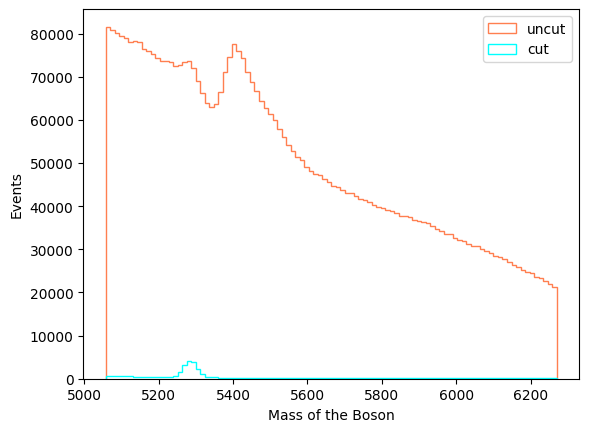

Original data length is: 5135823 
Cut data length is: 38744 


In [24]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

min_value = np.percentile(Array["B_MM"], 1)
max_value =  np.percentile(Array["B_MM"], 99)

plt.hist(Array["B_MM"], range=(min_value, max_value), bins= 100, color="coral", histtype= 'step',label ='uncut')
plt.hist(temp["B_MM"], range=(min_value, max_value), bins= 100, color="cyan", histtype= 'step',label ='cut')
plt.xlabel("Mass of the Boson")
plt.ylabel("Events")
plt.legend()
plt.show()

print(f"Original data length is: %i \nCut data length is: %i " %(len(Array), len(temp)))

noticeable is how much data we are cutting with this selection but a peak is still noticable at around 5300

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [25]:
!pip install lmfit

In [26]:
from scipy.optimize import curve_fit
from lmfit.models import ExponentialModel, GaussianModel

In [27]:
from lmfit import Model

Making of the plotfitting with an Exonential model and Gaussian added

[[Model]]
    (Model(exponential, prefix='exp_') + Model(gaussian, prefix='g1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 82
    # data points      = 150
    # variables        = 5
    chi-square         = 56806.4308
    reduced chi-square = 391.768488
    Akaike info crit   = 900.515428
    Bayesian info crit = 915.568605
    R-squared          = 0.99627590
[[Variables]]
    exp_amplitude:  1295640.71 +/- 576400.283 (44.49%) (init = 1300000)
    exp_decay:      574.541056 +/- 27.5191048 (4.79%) (init = 500)
    g1_amplitude:   67730.7671 +/- 463.325409 (0.68%) (init = 90000)
    g1_center:      5284.54031 +/- 0.12551422 (0.00%) (init = 5280)
    g1_sigma:       17.7127124 +/- 0.13038986 (0.74%) (init = 20)
    g1_fwhm:        41.7102487 +/- 0.30704464 (0.74%) == '2.3548200*g1_sigma'
    g1_height:      1525.49581 +/- 9.47190478 (0.62%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(exp_

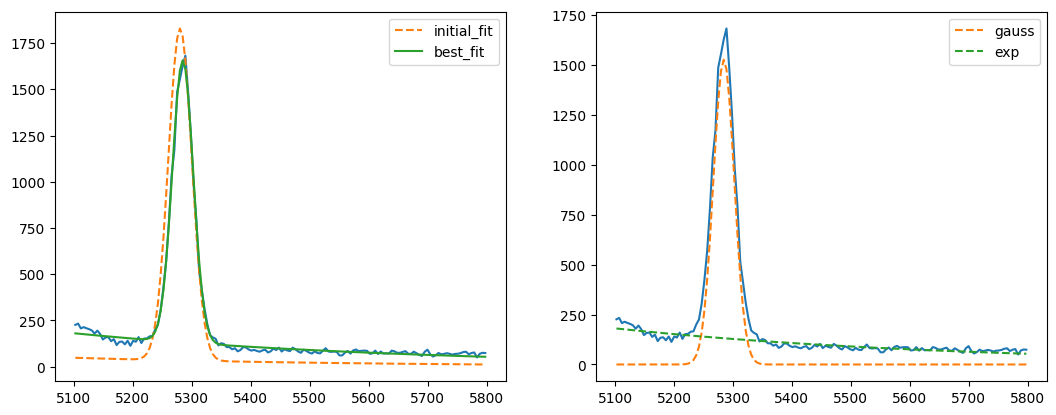

In [28]:
mod_expon = ExponentialModel(prefix='exp_')
mod_gauss = GaussianModel(prefix='g1_')

model = mod_expon + mod_gauss

params=model.make_params(g1_amplitude = 9e4, g1_center=5280, g1_sigma=20, exp_amplitude = 1.3e6, exp_decay = 500)

bin_contents, bin_edges = np.histogram(temp["B_MM"].to_numpy(), bins=150, range=(5100, 5800))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) /2.0

result = model.fit(bin_contents, params, x=bin_centers)

init = model.eval(params, x=bin_centers)

print(result.fit_report())

x=bin_centers
y=bin_contents

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x,y)
axes[0].plot(x, init, '--', label='initial_fit')
axes[0].plot(x, result.best_fit, '-', label='best_fit')
axes[0].legend()

comps =result.eval_components(x=x)
axes[1].plot(x,y)
axes[1].plot(x, comps['g1_'], '--', label ='gauss')
axes[1].plot(x, comps['exp_'], '--', label ='exp')
axes[1].legend()


plt.show()

looking at the best fit i would say it is accurate as it almost follows the graph to a T

In [29]:
#Lets say for the amount of events found the bin count needs to be aboven 500
events = (bin_contents[np.where(bin_contents > 500)].sum())
#this should be the amount of events happening within our peak
#If you want to substract the noise then
average = (np.average(bin_contents[np.where(bin_contents < 500)]))
eventsMinusAverage = bin_contents[np.where(bin_contents > 500)].sum() - len(bin_contents[np.where(bin_contents > 500)])*average
print(bin_contents[np.where(bin_contents > 500)])
print(events)
print(int(eventsMinusAverage))

[ 571  781 1036 1172 1486 1554 1627 1682 1485 1256  982  791  516]
14939
13484


But this would be kind of a rudimentary way to determine it

We Could also use the integral for calcualting it based on bins:

In [30]:
temp2 =bin_contents[np.where(bin_contents > 500)]
print(temp2)
print(np.trapz(temp2))

[ 571  781 1036 1172 1486 1554 1627 1682 1485 1256  982  791  516]
14395.5


In [31]:
from lmfit.models import ExponentialGaussianModel

Here i tried to use the standard ExponentialGaussianModel build into lmfit the results are similar

[[Model]]
    Model(expgaussian, prefix='m1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 75
    # data points      = 100
    # variables        = 4
    chi-square         = 2231944.54
    reduced chi-square = 23249.4222
    Akaike info crit   = 1009.32136
    Bayesian info crit = 1019.74204
    R-squared          = 0.90196592
[[Variables]]
    m1_amplitude:  124139.548 +/- 4471.55861 (3.60%) (init = 90000)
    m1_center:     5273.51891 +/- 2.84509960 (0.05%) (init = 5280)
    m1_sigma:      17.5351828 +/- 1.64507740 (9.38%) (init = 20)
    m1_gamma:      0.07906491 +/- 0.02534328 (32.05%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(m1_center, m1_gamma)     = +0.9590
    C(m1_sigma, m1_gamma)      = +0.8371
    C(m1_center, m1_sigma)     = +0.8026
    C(m1_amplitude, m1_gamma)  = -0.3438
    C(m1_amplitude, m1_center) = -0.3297


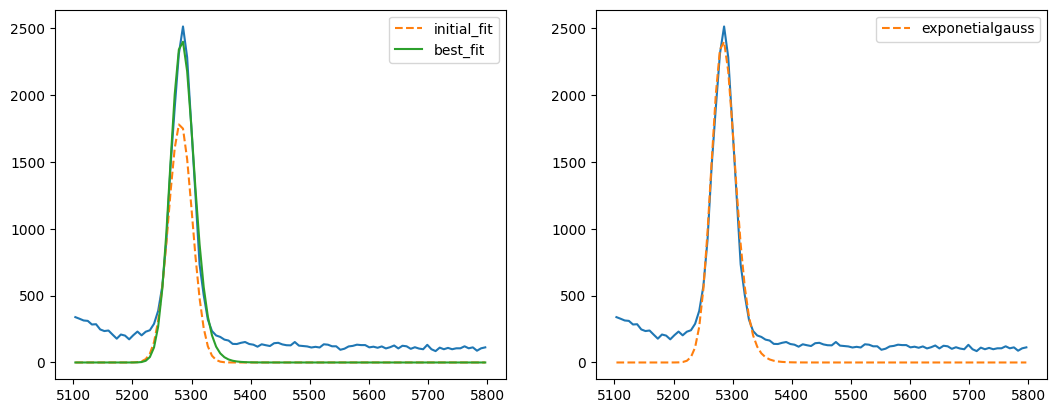

In [33]:

model1 = ExponentialGaussianModel(prefix='m1_')
params=model1.make_params(m1_amplitude = 9e4, m1_center=5280, m1_sigma=20,  m1_decay = 500)

bin_contents, bin_edges = np.histogram(temp["B_MM"].to_numpy(), bins=100, range=(5100, 5800))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) /2.0

result = model1.fit(bin_contents, params, x=bin_centers)

init = model1.eval(params, x=bin_centers)

print(result.fit_report())

x=bin_centers
y=bin_contents

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x,y)
axes[0].plot(x, init, '--', label='initial_fit')
axes[0].plot(x, result.best_fit, '-', label='best_fit')
axes[0].legend()

comps =result.eval_components(x=x)
axes[1].plot(x,y)
axes[1].plot(x, comps['m1_'], '--', label ='exponetialgauss')
axes[1].legend()

In [34]:
#looking at the best fit i would say it is accurate as it almost follows the graph to a T

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [35]:
#find center and deviation
sigma =  result.values["m1_sigma"]
center = result.values["m1_center"]

test for myself to check if it works like i think it should

In [36]:
print(len(temp.B_MM))
test = np.where(
    (temp.B_MM > (center-sigma))
    & (temp.B_MM < (center+sigma))
    )[0]

test2 = np.take(Array, test)
print(len(test2.B_MM))

38744
9592


In [37]:
#Here do your calculation of the final result
#make a new selection for Bplus and Bmin
#The charge statement ==1 / -1 is because if you add up a combination of three 1's and -1's where you want 2 of one and 1 of the other the answer will always be -1 or 1
#Ans we only use the values which are within our accepted Deviation SIGMA

cutselectionBPlus = np.where(
    (Array.H1_ProbK > Array.H1_ProbPi)
    & (Array.H2_ProbK > Array.H2_ProbPi)
    &  (Array.H3_ProbK > Array.H3_ProbPi)
    & (Array.H1_isMuon == 0)
    & (Array.H2_isMuon == 0)
    & (Array.H3_isMuon == 0)
    & (((Array.H1_Charge ) + (Array.H2_Charge) + (Array.H3_Charge )) == 1)
    & (Array.B_MM > (center-sigma))
    & (Array.B_MM < (center+sigma))
    )[0]

cutselectionBMin = np.where(
    (Array.H1_ProbK > Array.H1_ProbPi)
    & (Array.H2_ProbK > Array.H2_ProbPi)
    &  (Array.H3_ProbK > Array.H3_ProbPi)
    & (Array.H1_isMuon == 0)
    & (Array.H2_isMuon == 0)
    & (Array.H3_isMuon == 0)
    & (((Array.H1_Charge ) + (Array.H2_Charge) + (Array.H3_Charge )) == -1)
    & (Array.B_MM > (center-sigma))
    & (Array.B_MM < (center+sigma))
    )[0]

selectionBPlus = np.take(Array, cutselectionBPlus)
selectionBMin = np.take(Array, cutselectionBMin)
print("Events for B plus found: %i" %len(selectionBPlus))
print("Events for B minus found: %i" %len(selectionBMin))

Events for B plus found: 5167
Events for B minus found: 4425


In [38]:
# find our A and SigA and try to print it elegantly

A = (len(selectionBMin) - len(selectionBPlus))/(len(selectionBMin) + len(selectionBPlus))
SigA = ( (1-A**2) / (len(selectionBMin) + len(selectionBPlus)) )**0.5
print(f"The asymmetry for A is: %f\nThe uncertainty for A is: %f" %(A, SigA))



The asymmetry for A is: -0.077356
The uncertainty for A is: 0.010180


#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)